### Import needed packages and scripts

In [393]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from datetime import datetime
import pickle, json, sys, os, glob
import pandas as pd


# location of the scripts
sys.path.insert(0, os.getcwd() + "/../scripts/")
import auxiliar as aux
import plotting

### Paths to data and results

In [300]:
# Number of rows for each job
n_rows = 6000

# Root path of this script
root = os.getcwd() + "/"
# Objects directory
root_objects = root + "objects/"

# Some filenames -------------------
# Filename of the total dictionary
fname_total_dict = root_objects + "total_dict.pkl"
# Weather station file
ws_database = root_objects + "WS2003-22_short.h5"

# Create needed folders
for dir in [root + "plots"]:
    if not os.path.exists(dir):
        os.makedirs(dir)

# Some relevant dates
covid_lockdown   = [datetime.fromisoformat("2020-03-14"), datetime.fromisoformat("2020-06-21")]
volcano_eruption = [datetime.fromisoformat("2021-09-19"), datetime.fromisoformat("2021-12-13")]

### Opening the dictionary containing all the data

In [3]:
# To read the file:
with open(fname_total_dict, 'rb') as f:
        total_dict = pickle.load(f)   

# Loading the weather station database
df_ws = pd.read_hdf(ws_database)

# Loading the timestamp of each entry in the datacheck dictionary
dates_dcheck = dict_dcheck["time"]

### Averaging results in runs

In [47]:
%%time
run_number = []
number_of_subruns = []
timestamp  = []
telapsed   = []
azimuth    = []
zenith     = []
intensity_at_half_peak_rate = []
pwl_norm   = []
pwl_delta_norm = []
pwl_index  = []
light_yield = []
temperature = []
pressure = []
humidity = []
wind_speed = []
wind_gust = []
wind_speed_average = []
tng_dust = []
tng_seeing = []
rain = []

for i, run in enumerate(total_dict.keys()):

    print(f"Reading and averaging... {i:6}/{len(total_dict.keys())} runs") if i % 500 == 0 else None

    try:
        run_number.append(run)
        number_of_subruns.append(len(total_dict[run].keys()))
        timestamp.append(total_dict[run][0]["time"])
        telapsed.append(np.sum([total_dict[run][srun]["telapsed"] for srun in total_dict[run].keys()]))
        azimuth.append(np.mean([total_dict[run][srun]["az"] for srun in total_dict[run].keys()]))
        zenith.append(np.mean([total_dict[run][srun]["zd"] for srun in total_dict[run].keys()]))
        intensity_at_half_peak_rate.append(np.mean([total_dict[run][srun]["ZD_corrected_intensity_at_half_peak_rate"] for srun in total_dict[run].keys()]))
        pwl_norm.append(np.mean([total_dict[run][srun]["ZD_corrected_cosmics_rate_at_422_pe"] for srun in total_dict[run].keys()]))
        pwl_delta_norm.append(np.mean([total_dict[run][srun]["ZD_corrected_delta_cosmics_rate_at_422_pe"] for srun in total_dict[run].keys()]))
        pwl_index.append(np.mean([total_dict[run][srun]["ZD_corrected_cosmics_spectral_index"] for srun in total_dict[run].keys()]))
        light_yield.append(np.mean([total_dict[run][srun]["light_yield"] for srun in total_dict[run].keys()]))

        temp_array = [total_dict[run][srun]["weather"]["temperature"] for srun in total_dict[run].keys()]
        if temp_array[0] != None:
            temperature.append(np.mean(temp_array))
            pressure.append(np.mean([total_dict[run][srun]["weather"]["pressure"] for srun in total_dict[run].keys()]))
            humidity.append(np.mean([total_dict[run][srun]["weather"]["humidity"] for srun in total_dict[run].keys()]))
            wind_speed.append(np.mean([total_dict[run][srun]["weather"]["wind_speed"] for srun in total_dict[run].keys()]))
            wind_gust.append(np.mean([total_dict[run][srun]["weather"]["wind_gust"] for srun in total_dict[run].keys()]))
            wind_speed_average.append(np.mean([total_dict[run][srun]["weather"]["wind_speed_average"] for srun in total_dict[run].keys()]))
            tng_dust.append(np.mean([total_dict[run][srun]["weather"]["tng_dust"] for srun in total_dict[run].keys()]))
            tng_seeing.append(np.mean([total_dict[run][srun]["weather"]["tng_seeing"] for srun in total_dict[run].keys()]))
            rain.append(np.mean([total_dict[run][srun]["weather"]["rain"] for srun in total_dict[run].keys()]))
        else:
            temperature.append(None)
            pressure.append(None)
            humidity.append(None)
            wind_speed.append(None)
            wind_gust.append(None)
            wind_speed_average.append(None)
            tng_dust.append(None)
            tng_seeing.append(None)
            rain.append(None)
    
    except:
        print(run)
        
# Now convert to numpy arrays
run_number = np.array(run_number)
number_of_subruns = np.array(number_of_subruns)
timestamp  = np.array(timestamp)
telapsed   = np.array(telapsed)
azimuth    = np.array(azimuth)
zenith     = np.array(zenith)
intensity_at_half_peak_rate = np.array(intensity_at_half_peak_rate)
pwl_norm   = np.array(pwl_norm)
pwl_delta_norm = np.array(pwl_delta_norm)
pwl_index  = np.array(pwl_index)
light_yield = np.array(light_yield)
temperature = np.array(temperature)
pressure = np.array(pressure)
humidity = np.array(humidity)
wind_speed = np.array(wind_speed)
wind_gust = np.array(wind_gust)
wind_speed_average = np.array(wind_speed_average)
tng_dust = np.array(tng_dust)
tng_seeing = np.array(tng_seeing)
rain = np.array(rain)

Reading and averaging...      0/7516 runs
Reading and averaging...    500/7516 runs
Reading and averaging...   1000/7516 runs
Reading and averaging...   1500/7516 runs
Reading and averaging...   2000/7516 runs
Reading and averaging...   2500/7516 runs
Reading and averaging...   3000/7516 runs
Reading and averaging...   3500/7516 runs
Reading and averaging...   4000/7516 runs
Reading and averaging...   4500/7516 runs
Reading and averaging...   5000/7516 runs
Reading and averaging...   5500/7516 runs
Reading and averaging...   6000/7516 runs
Reading and averaging...   6500/7516 runs
Reading and averaging...   7000/7516 runs
Reading and averaging...   7500/7516 runs
CPU times: user 4.11 s, sys: 340 ms, total: 4.45 s
Wall time: 4.44 s


### Extracting the total data of the WS

In [241]:
# Loading the weather station database
df_ws = pd.read_hdf(ws_database)

# Getting the min and max dates
maxdate = np.max(timestamp)
mindate = np.min(timestamp)

# Converting the weather station dates to datetime objects
dates_ws = np.array([datetime.fromisoformat(str(d).split(".")[0]) for d in df_ws.index])

# Masking the weather station data to the min and max dates of the datacheck dictionary
mask_dates  = ((dates_ws > mindate) & (dates_ws < maxdate))

total_mask = (mask_dates)

dates_ws = dates_ws[total_mask]
df_ws    = df_ws[total_mask]

### Plotting all

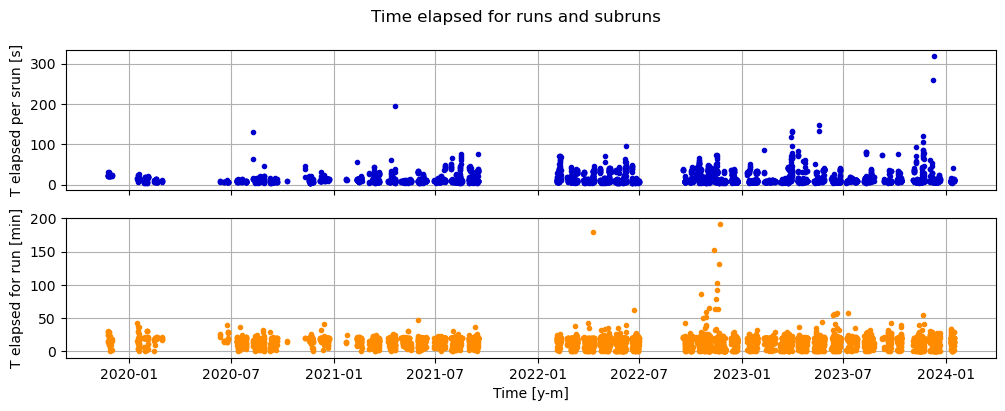

In [317]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4), sharex=True)

ax1.plot(timestamp, telapsed / number_of_subruns, ".", color="mediumblue")
ax2.plot(timestamp, telapsed / 60, ".", color="darkorange")

ax2.set_xlabel("Time [y-m]")
ax1.set_ylabel("T elapsed per srun [s]")
ax2.set_ylabel("T elapsed for run [min]")
ax1.grid()
ax2.grid()
fig.suptitle("Time elapsed for runs and subruns")

# plt.savefig(f"plots/total.png", bbox_inches="tight", dpi=300)
plt.show()

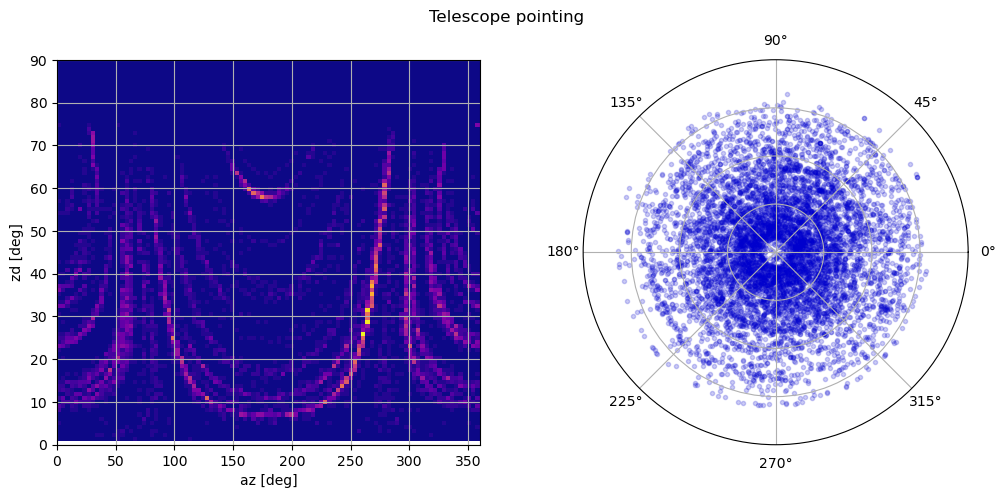

In [318]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection="polar")

ax1.hist2d(azimuth, zenith, 100, cmap="plasma")
ax2.scatter(azimuth, zenith, marker=".", color="mediumblue", alpha=0.2)

for ax in [ax1, ax2]:
    ax.grid(True, zorder=-100)
    ax.set_ylim(0, 90)
ax1.set_xlim(0, 360)
ax2.set_yticks([22.5, 45, 67.5], [])
ax1.set_xlabel("az [deg]")
ax1.set_ylabel("zd [deg]")
fig.suptitle("Telescope pointing")

# plt.savefig(f"plots/total.png", bbox_inches="tight", dpi=300)
plt.show()

In [150]:
date_objects     = np.linspace(min(timestamp).timestamp(), max(timestamp).timestamp(), 2000)
datetime_objects = np.array([datetime.fromtimestamp(timestamp) for timestamp in date_objects])

# Function to calculate moon phase (1 for full moon, 0 for no moon)
def calculate_moon_phase(date):
    # Define the period of the moon's cycle (in seconds)
    lunar_cycle_period = 29.530588 * 24 * 60 * 60  # Approximately 29.53 days

    # Calculate the phase angle in radians
    phase_angle = 2 * np.pi * (date.timestamp() - datetime.strptime("2024-01-25-17:54", "%Y-%m-%d-%H:%M").timestamp()) / lunar_cycle_period

    # Use a sinusoidal function to model the moon phase
    moon_phase = 0.5 + 0.5 * np.sin(phase_angle)

    return moon_phase

# Get moon phases for each datetime object
moon_phases = np.array([calculate_moon_phase(dt) for dt in datetime_objects])


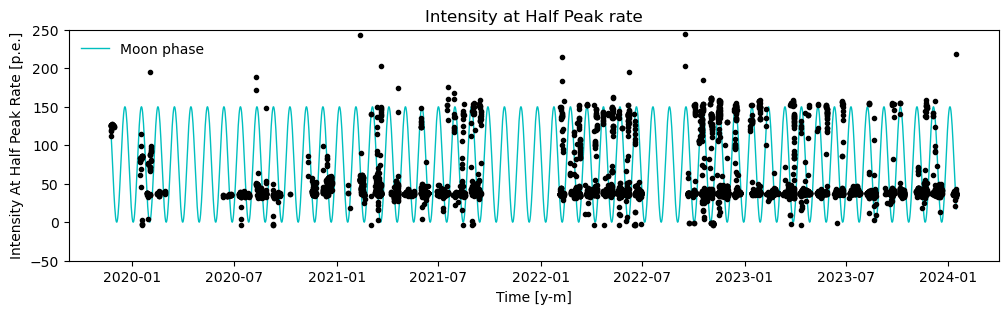

In [471]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))

ax.scatter(timestamp, intensity_at_half_peak_rate, marker=".", color="k")
ax.plot(datetime_objects, moon_phases*150, zorder=-10, lw=1, color="c", label="Moon phase")

ax.legend(frameon=False)
ax.set_xlabel("Time [y-m]")
ax.set_ylabel("Intensity At Half Peak Rate [p.e.]")
ax.set_ylim(-50, 250)
ax.set_title("Intensity at Half Peak rate")

plt.savefig(f"plots/total.png", bbox_inches="tight", dpi=300)
plt.show()

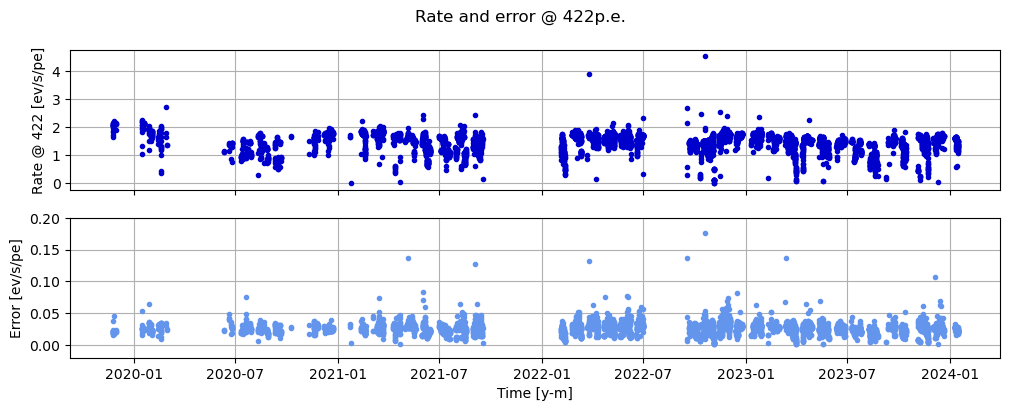

In [320]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4), sharex=True)

ax1.plot(timestamp, pwl_norm, marker=".", ls="", color="mediumblue")
ax2.plot(timestamp, pwl_delta_norm, marker=".", ls="", color="cornflowerblue")

ax2.set_xlabel("Time [y-m]")
ax1.set_ylabel("Rate @ 422 [ev/s/pe]")
ax2.set_ylabel("Error [ev/s/pe]")
ax2.set_ylim(-0.02, 0.2)
ax1.grid()
ax2.grid()
fig.suptitle("Rate and error @ 422p.e.")

# plt.savefig(f"plots/total.png", bbox_inches="tight", dpi=300)
plt.show()

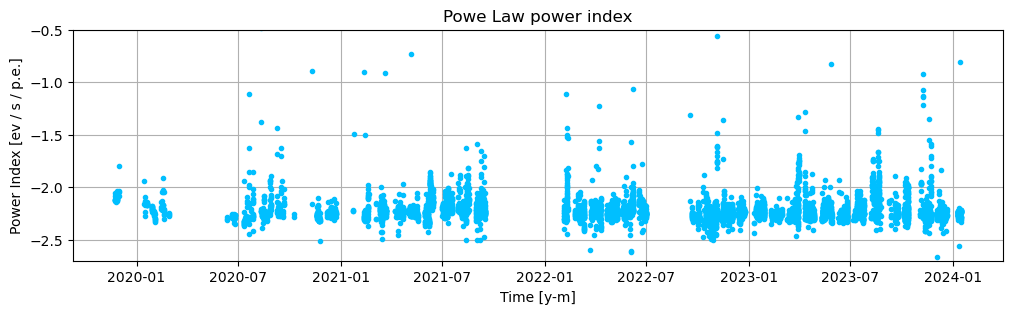

In [323]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))

ax.plot(timestamp, pwl_index, marker=".", ls="", color="deepskyblue")

ax.set_xlabel("Time [y-m]")
ax.set_ylabel("Power Index [ev / s / p.e.]")
ax.set_ylim(-2.7, -0.5)
ax.grid()
ax.set_title("Powe Law power index")

# plt.savefig(f"plots/total.png", bbox_inches="tight", dpi=300)
plt.show()

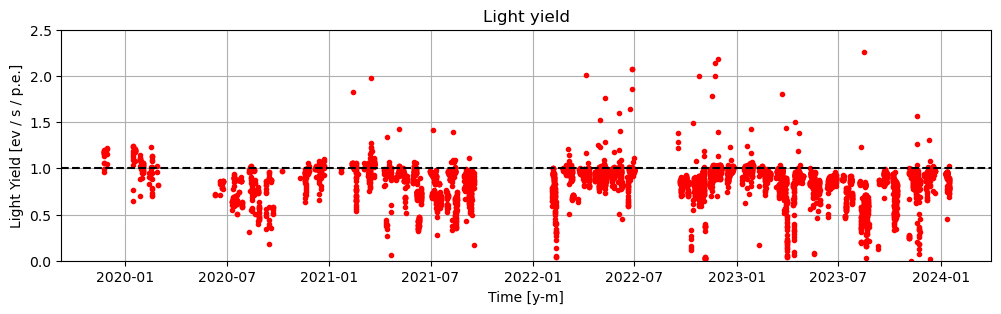

In [324]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))

ax.plot(timestamp, light_yield, marker=".", ls="", color="r")

ax.set_xlabel("Time [y-m]")
ax.set_ylabel("Light Yield [ev / s / p.e.]")
ax.set_ylim(0, 2.5)
ax.axhline(1, ls="--", color="k")
ax.grid()
ax.set_title("Light yield")

# plt.savefig(f"plots/total.png", bbox_inches="tight", dpi=300)
plt.show()

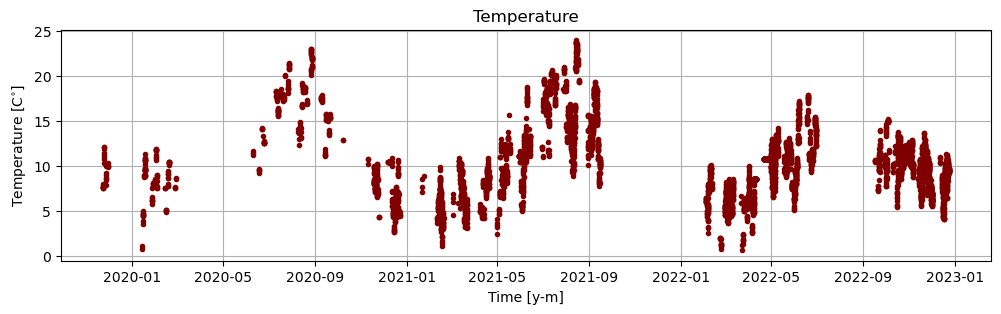

In [325]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))

ax.plot(timestamp, temperature, marker=".", ls="", color="maroon")

ax.set_xlabel("Time [y-m]")
ax.set_ylabel("Temperature [C$^{\circ}$]")
ax.grid()
ax.set_title("Temperature")

# plt.savefig(f"plots/total.png", bbox_inches="tight", dpi=300)
plt.show()

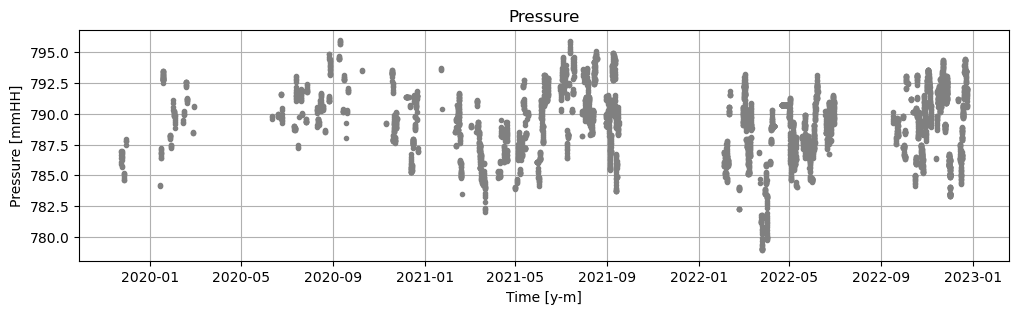

In [326]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))

ax.plot(timestamp, pressure, marker=".", ls="", color="gray")

ax.set_xlabel("Time [y-m]")
ax.set_ylabel("Pressure [mmHH]")
ax.grid()
ax.set_title("Pressure")

# plt.savefig(f"plots/total.png", bbox_inches="tight", dpi=300)
plt.show()

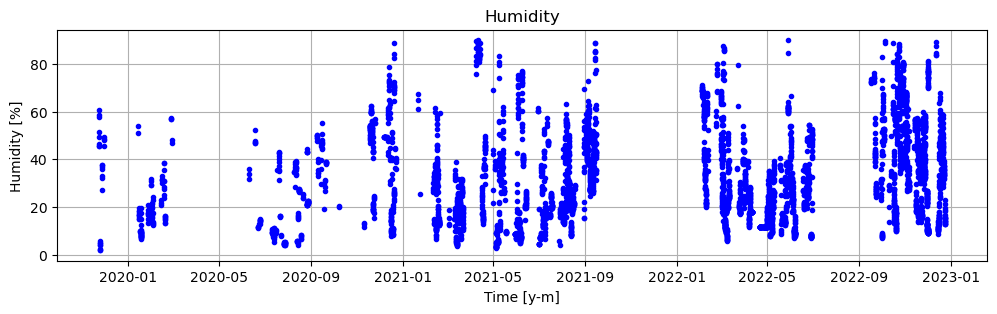

In [327]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))

ax.plot(timestamp, humidity, marker=".", ls="", color="b")

ax.set_xlabel("Time [y-m]")
ax.set_ylabel("Humidity [%]")
ax.grid()
ax.set_title("Humidity")

# plt.savefig(f"plots/total.png", bbox_inches="tight", dpi=300)
plt.show()

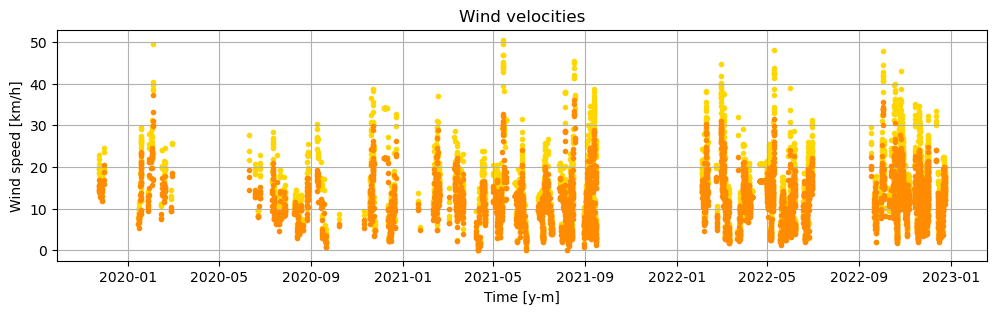

In [329]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))

# ax.plot(timestamp, wind_speed, marker=".", ls="", color="r", zorder=5)
ax.plot(timestamp, wind_gust, marker=".", ls="", color="gold", zorder=0, label="Wind gust")
ax.plot(timestamp, wind_speed_average, marker=".", ls="", color="darkorange", zorder=10, label="A")

ax.set_xlabel("Time [y-m]")
ax.set_ylabel("Wind speed [km/h]")
ax.grid()
ax.set_title("Wind velocities")

# plt.savefig(f"plots/total.png", bbox_inches="tight", dpi=300)
plt.show()

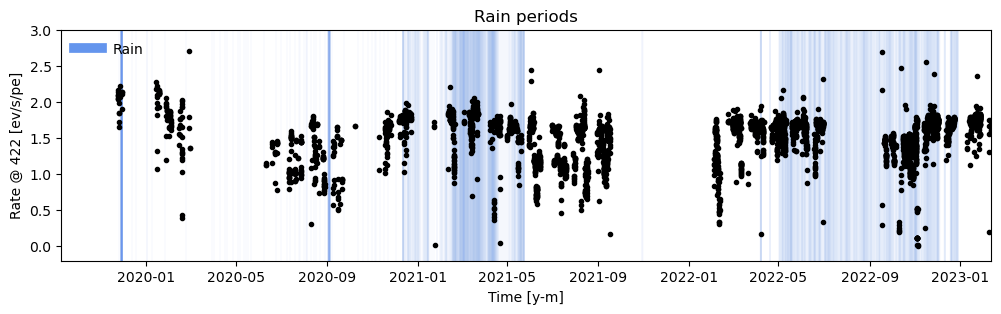

In [330]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))

ax.plot(timestamp, pwl_norm, marker=".", ls="", color="k", zorder=10)

rain_total = np.array(df_ws["rain"])
rain_start = []
rain_end = []
for i, r in enumerate(rain_total):
    if r == 0 and rain_total[i-1] == -1:
        rain_end.append(dates_ws[i])
    elif r == -1 and rain_total[i-1] == 0:
        rain_start.append(dates_ws[i])

for i in range(len(rain_start)):
    ax.axvline((rain_start[i] + (rain_end[i] - rain_start[i])/2 ) , color="cornflowerblue", alpha=0.9, lw=0.05)

ax.axvline(np.nan, color="cornflowerblue",lw=7, label="Rain")
ax.legend(frameon=False)

ax.set_xlabel("Time [y-m]")
ax.set_ylabel("Rate @ 422 [ev/s/pe]")
ax.set_ylim(-0.2, 3)
ax.set_xlim(18148, 19400)
ax.set_title("Rain periods")

# plt.savefig(f"plots/total.png", bbox_inches="tight", dpi=300)
plt.show()

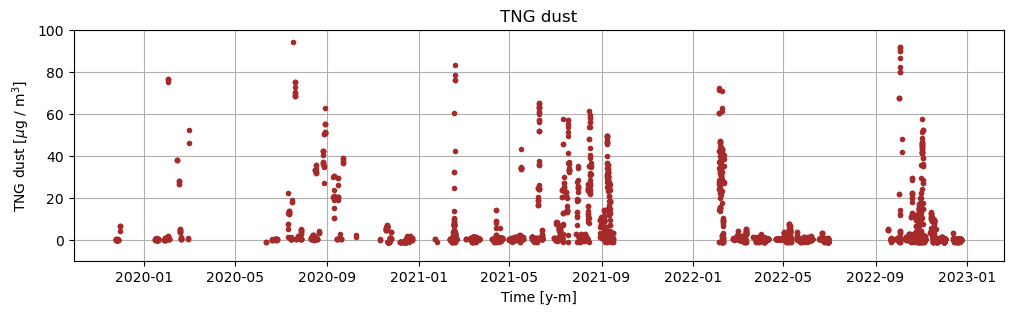

In [331]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))

ax.plot(timestamp, tng_dust, marker=".", ls="", color="brown")

ax.set_xlabel("Time [y-m]")
ax.set_ylabel("TNG dust [$\\mu$g / m${}^3$]")
ax.grid()
ax.set_ylim(-10, 100)
ax.set_title("TNG dust")

# plt.savefig(f"plots/total.png", bbox_inches="tight", dpi=300)
plt.show()

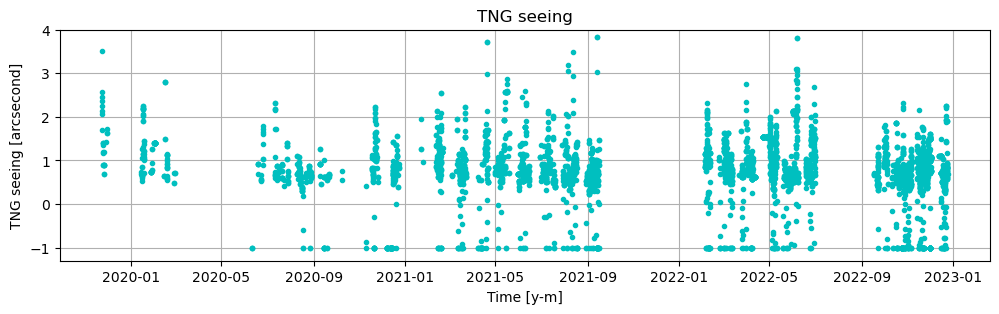

In [332]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))

ax.plot(timestamp, tng_seeing, marker=".", ls="", color="c")

ax.set_xlabel("Time [y-m]")
ax.set_ylabel("TNG seeing [arcsecond]")
ax.grid()
ax.set_ylim(-1.3, 4)
ax.set_title("TNG seeing")

# plt.savefig(f"plots/total.png", bbox_inches="tight", dpi=300)
plt.show()

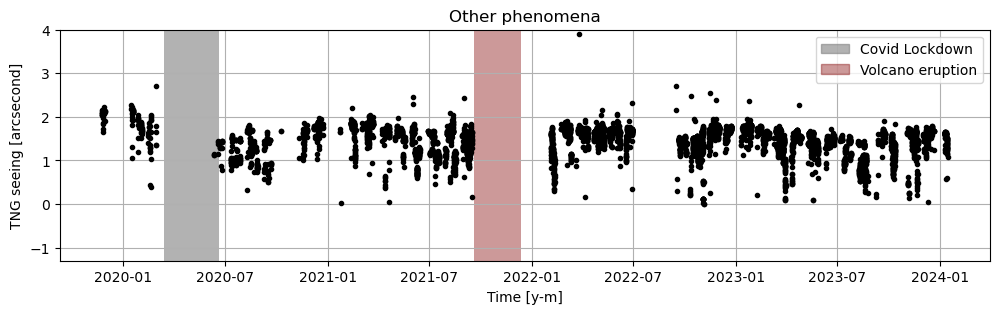

In [355]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))

ax.plot(timestamp, pwl_norm, marker=".", ls="", color="k")

# Covid Lockdown
ax.axvspan(covid_lockdown[0], covid_lockdown[1], color="gray", alpha=0.6, ls="", label="Covid Lockdown")
# Volcano eruption
ax.axvspan(volcano_eruption[0], volcano_eruption[1], color="maroon", alpha=0.4, ls="", label="Volcano eruption")

ax.set_xlabel("Time [y-m]")
ax.set_ylabel("TNG seeing [arcsecond]")
ax.grid()
ax.set_ylim(-1.3, 4)
ax.legend()
ax.set_title("Other phenomena")

# plt.savefig(f"plots/total.png", bbox_inches="tight", dpi=300)
plt.show()

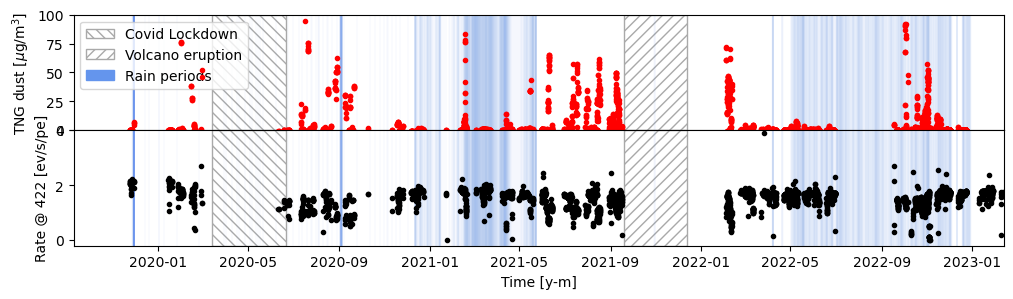

In [470]:
fig, (ax2, ax) = plt.subplots(2, 1, figsize=(12, 3), sharex=True)

ax.plot(timestamp, pwl_norm, marker=".", ls="", color="k", zorder=10)
ax2.plot(timestamp, tng_dust, marker=".", ls="", color="r", zorder=10)

for axe in [ax, ax2]:
    for i in range(len(rain_start)):
        axe.axvline((rain_start[i] + (rain_end[i] - rain_start[i])/2 ) , color="cornflowerblue", alpha=0.9, lw=0.05)
    
    # Covid Lockdown
    axe.axvspan(covid_lockdown[0], covid_lockdown[1], ls="-", label="Covid Lockdown",
              facecolor="none", hatch="\\\\\\", edgecolor="darkgray")
    # Volcano eruption
    axe.axvspan(volcano_eruption[0], volcano_eruption[1], ls="-", label="Volcano eruption",
              facecolor="none", hatch="///", edgecolor="darkgray")

ax2.axvspan(None, None, color="cornflowerblue", label="Rain periods")

ax2.legend(ncols=1, frameon=True)
ax.set_xlabel("Time [y-m]")
ax.set_ylabel("Rate @ 422 [ev/s/pe]")
ax2.set_ylabel("TNG dust [$\mu$g/m$^3$]")
ax.set_ylim(-0.2, 4)
ax2.set_ylim(0, 100)
ax.set_xlim(18148, 19400)
plt.subplots_adjust(wspace=0, hspace=0)

# plt.savefig(f"plots/total.png", bbox_inches="tight", dpi=300)
plt.show()

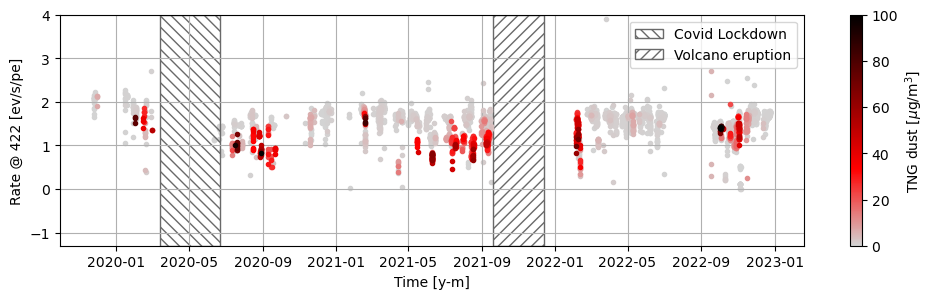

In [463]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))

mask_weather = [tng_dust != None][0]

pcols = ["lightgray", "r", "maroon", "k"]
ran   = [0, 100]
colors = plotting.get_colors_multiplot(tng_dust[mask_weather], input_colors=pcols, range=ran)
cmap   = plotting.create_cmap_from_colors(pcols)
for i in range(len(timestamp[mask_weather])):

    if tng_dust[mask_weather][i] != None:
        ax.plot(timestamp[mask_weather][i], pwl_norm[mask_weather][i],
                marker=".", ls="", color=colors[i], zorder=tng_dust[mask_weather][i])

plotting.plot_colorbar(fig, ax, ran, cmap, label="TNG dust [$\mu$g/m$^3$]")

# Covid Lockdown
ax.axvspan(covid_lockdown[0], covid_lockdown[1], ls="-", label="Covid Lockdown",
          facecolor="none", hatch="\\\\\\", edgecolor="dimgray")
# Volcano eruption
ax.axvspan(volcano_eruption[0], volcano_eruption[1], ls="-", label="Volcano eruption",
          facecolor="none", hatch="///", edgecolor="dimgray")

ax.set_xlabel("Time [y-m]")
ax.set_ylabel("Rate @ 422 [ev/s/pe]")
ax.grid()
ax.set_ylim(-1.3, 4)
ax.legend()

# plt.savefig(f"plots/total.png", bbox_inches="tight", dpi=300)
plt.show()

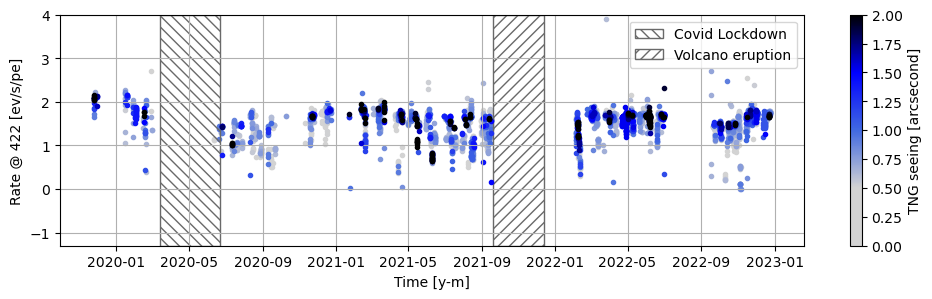

In [469]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))

mask_weather = [tng_dust != None][0]

pcols = ["lightgray", "lightgray", "royalblue", "b", "k"]
ran   = [0, 2]
colors = plotting.get_colors_multiplot(tng_seeing[mask_weather], input_colors=pcols, range=ran)
cmap   = plotting.create_cmap_from_colors(pcols)
for i in range(len(timestamp[mask_weather])):

    if tng_dust[mask_weather][i] != None:
        ax.plot(timestamp[mask_weather][i], pwl_norm[mask_weather][i],
                marker=".", ls="", color=colors[i], zorder=tng_seeing[mask_weather][i])

plotting.plot_colorbar(fig, ax, ran, cmap, label="TNG seeing [arcsecond]")

# Covid Lockdown
ax.axvspan(covid_lockdown[0], covid_lockdown[1], ls="-", label="Covid Lockdown",
          facecolor="none", hatch="\\\\\\", edgecolor="dimgray")
# Volcano eruption
ax.axvspan(volcano_eruption[0], volcano_eruption[1], ls="-", label="Volcano eruption",
          facecolor="none", hatch="///", edgecolor="dimgray")

ax.set_xlabel("Time [y-m]")
ax.set_ylabel("Rate @ 422 [ev/s/pe]")
ax.grid()
ax.set_ylim(-1.3, 4)
ax.legend()

# plt.savefig(f"plots/total.png", bbox_inches="tight", dpi=300)
plt.show()

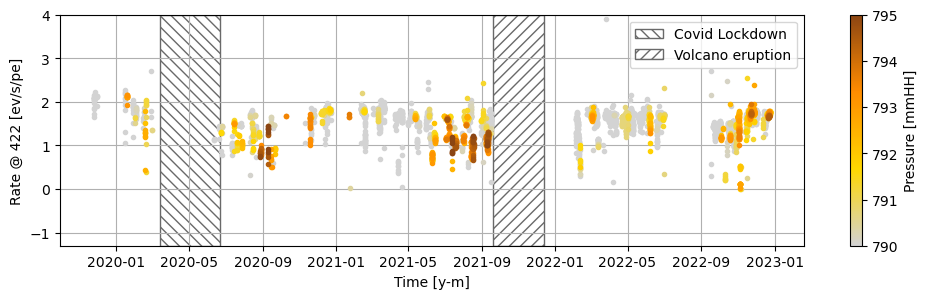

In [467]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))

mask_weather = [tng_dust != None][0]

pcols = ["lightgray", "gold", "darkorange", "saddlebrown"]
ran   = [790, 795]
colors = plotting.get_colors_multiplot(pressure[mask_weather], input_colors=pcols, range=ran)
cmap   = plotting.create_cmap_from_colors(pcols)
for i in range(len(timestamp[mask_weather])):

    if tng_dust[mask_weather][i] != None:
        ax.plot(timestamp[mask_weather][i], pwl_norm[mask_weather][i],
                marker=".", ls="", color=colors[i], zorder=pressure[mask_weather][i])

plotting.plot_colorbar(fig, ax, ran, cmap, label="Pressure [mmHH]")

# Covid Lockdown
ax.axvspan(covid_lockdown[0], covid_lockdown[1], ls="-", label="Covid Lockdown",
          facecolor="none", hatch="\\\\\\", edgecolor="dimgray")
# Volcano eruption
ax.axvspan(volcano_eruption[0], volcano_eruption[1], ls="-", label="Volcano eruption",
          facecolor="none", hatch="///", edgecolor="dimgray")

ax.set_xlabel("Time [y-m]")
ax.set_ylabel("Rate @ 422 [ev/s/pe]")
ax.grid()
ax.set_ylim(-1.3, 4)
ax.legend()

plt.savefig(f"plots/total.png", bbox_inches="tight", dpi=300)
plt.show()

(30.0, 50.0)

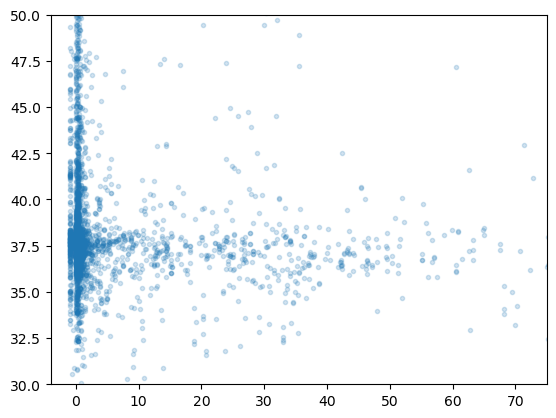

In [348]:
plt.plot(tng_dust, intensity_at_half_peak_rate, ".", alpha=0.2, ls="")
plt.xlim(-4, 75)
plt.ylim(30,50)

(0.0, 2.6)

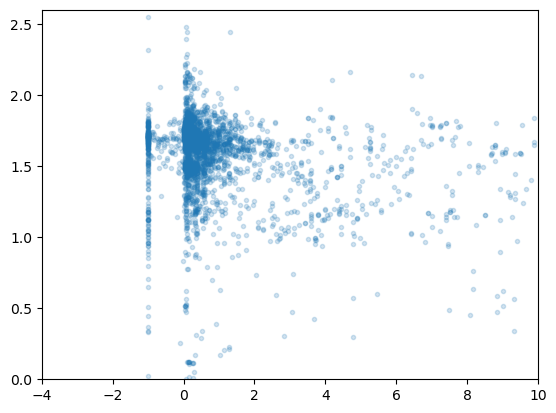

In [352]:
plt.plot(tng_dust, pwl_norm, ".", alpha=0.2, ls="")
plt.xlim(-4, 10)
plt.ylim(0,2.6)